# LAB 4 a) Implementation of Naive Bayes binary and multi-class Classifier 

# Team Details-:

**21BCE5676-Sireesha Pamidimokkala (Naive Bayes binary classifier)**

**21BCE5715-Mahika Annie Verghese (Naive Bayes multi-class classifier)**

# Objective :
The objective of the assignment is to implement Naive Bayes binary and multi-class classifiers for stroke prediction using a dataset containing various patient information. The classifiers will be used to predict the likelihood of a patient getting a stroke based on input parameters such as gender, age, hypertension, heart disease, marital status, work type, residence type, average glucose level, BMI, and smoking status. The implementation aims to accurately classify patients as either having a stroke or not having a stroke based on the provided input features.

# Binary-class Classifier
# Datset Description
The World Health Organization (WHO) states that stroke is the second leading cause of death worldwide, accounting for approximately 11% of all deaths. This dataset is used to predict the likelihood of a patient getting a stroke based on various input parameters such as gender, age, smoking status, and various diseases. Each row in the dataset provides relevant information about the patient.

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

# Exploratory analysis

In [3]:
import pandas as pd

df=pd.read_csv('stroke.csv') #importing and saving the dataset
df.head(20) #showing starting 20 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.shape #get the shape of dataframe created

(5110, 12)

In [5]:
df.isna().sum() #check the number of missing values in each column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.dtypes #check the data types of each column in dataframe

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
for col in df.columns: #Checking the unique values in each column
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())
        

gender
['Male' 'Female' 'Other']
ever_married
['Yes' 'No']
work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type
['Urban' 'Rural']
smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
df = df.drop(columns = ['id']) #dropping the column id as it is irrelevant for our purpose
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.shape 

(5110, 11)

In [10]:
df.describe().T #getting the summary statistics of the dataframe

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
df.bmi.fillna(df.bmi.mean(),inplace=True) #filling the missing values in bmi column with mean value of that column

In [12]:
df.isna().sum() #no missing values left

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

*Presently in our datset we have categorial variables but for implementation of algorithms, we would need them to be in numerical formats. Thus I am using LabelEncoder class from sklearn.preprocessing module of Python’s scikit-learn library to transform the non numerical variables*

In [13]:
#importing required class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
#In the gender column, mapping female to 0 and male to 1.
df['gender'] = le.fit_transform(df['gender'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1, 'Other': 2}


In [15]:
#In work_type column, mapping Govt_Job to 0, Never_worked to 1, Private to 2, Self employed to 3 and Children to 4.
df['work_type'] = le.fit_transform(df['work_type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}


In [16]:
#In the Residence_type column, mapping Rural to 0 and Urban to 1.
df['Residence_type'] = le.fit_transform(df['Residence_type'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Rural': 0, 'Urban': 1}


In [17]:
#In the smoking_status column, mapping Unkownto 0, formerly_smoked to 1, never smoked to 2, and smokes to 3.
df['smoking_status'] = le.fit_transform(df['smoking_status'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [18]:
#In the ever_married column, mapping no to 0 and yes to 1.
df['ever_married'] = le.fit_transform(df['ever_married'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'No': 0, 'Yes': 1}


In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [20]:
df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [21]:
# to count the number of times each unique value appears in the 'stroke' column ie how many columns with classification 1 (has stroke) and classifcation 2(no stroke)
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

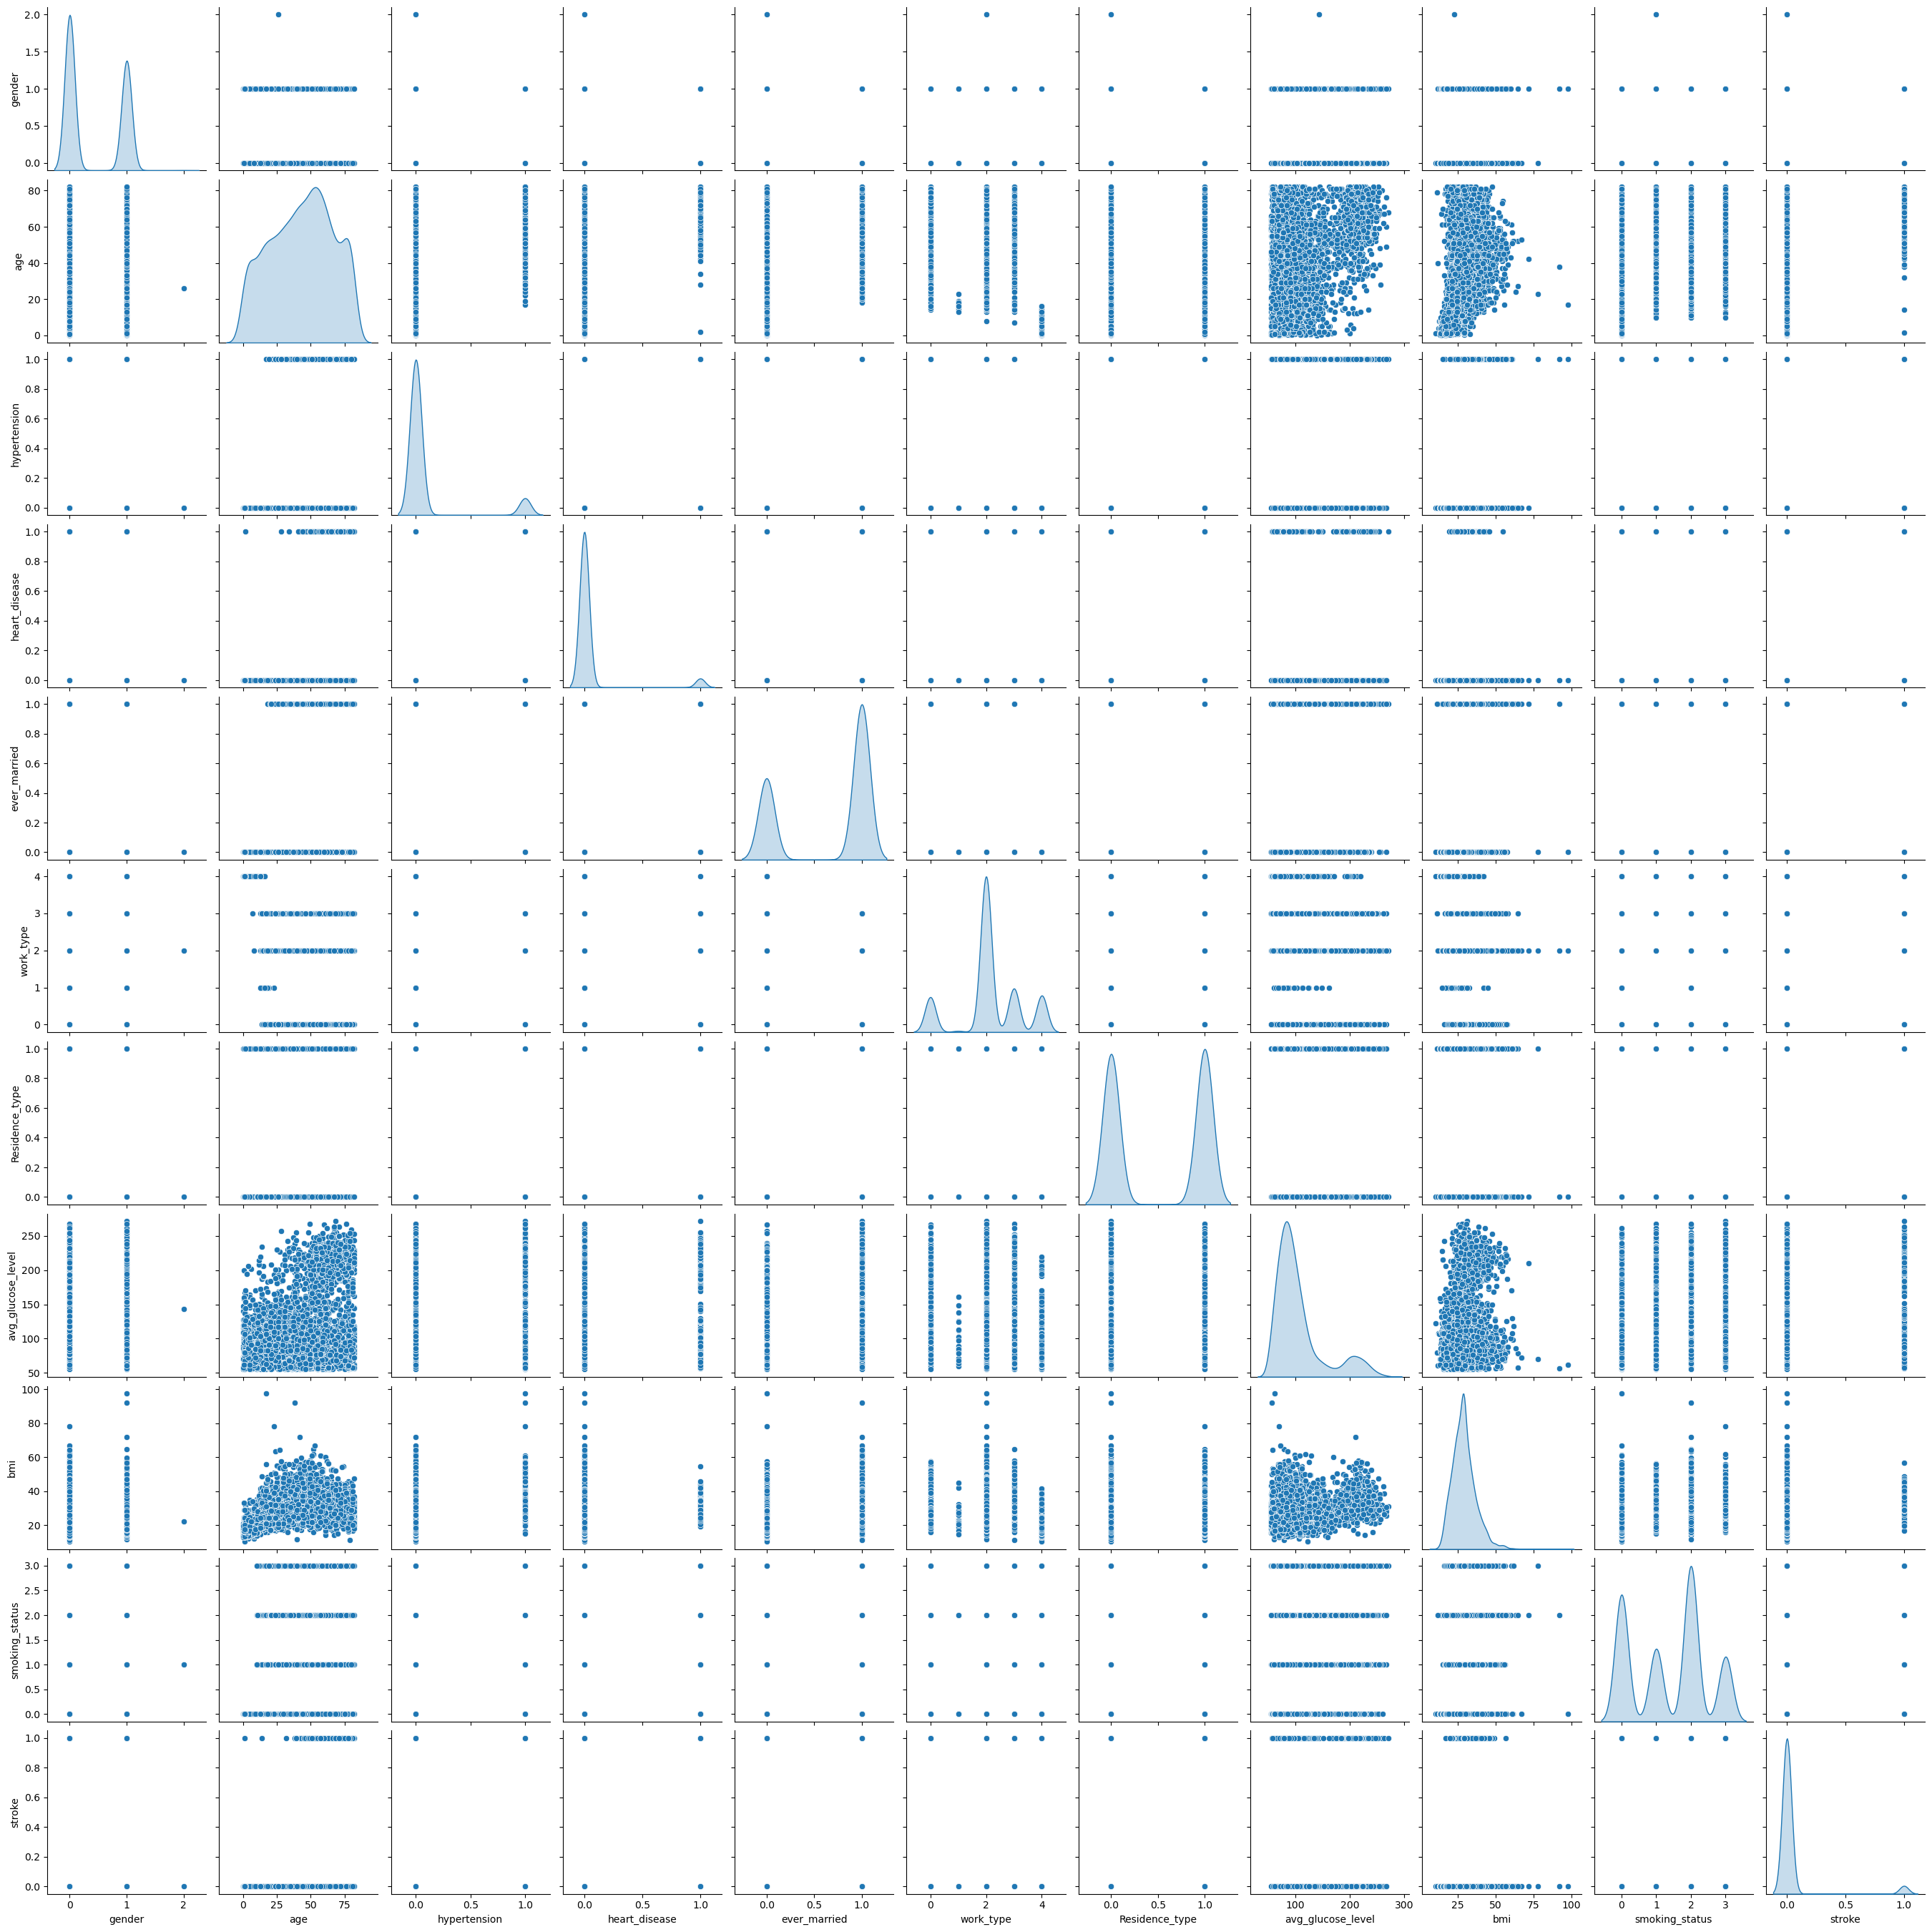

In [22]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [23]:
#getting the correlation matrix of dataframe
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


<Axes: >

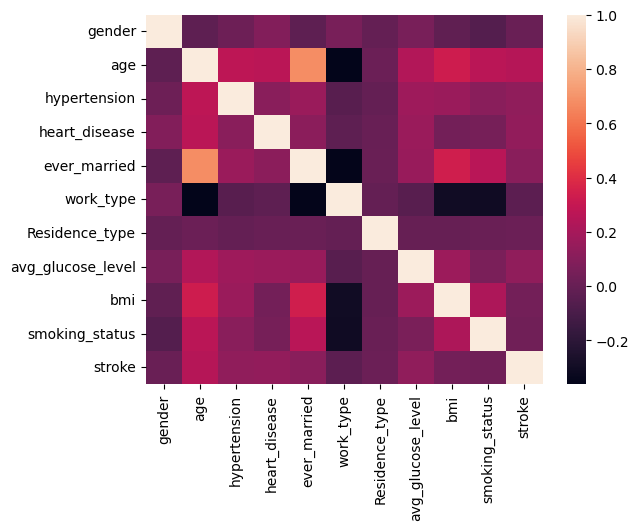

In [24]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

Hence we can infer that the following are independent variables:

1)gender 

2)age

3)hypertension

4)heart_disease

5)ever_married

6)work_type

7)Residence_type

8)avg_glucose_level

9)bmi

10)smoking_status  
    
These can be used to predict the dependent variable- Stroke

# Methodology
Through exploratory analysis, we have discovered that our database has one dependent variable that needs to be predicted - stroke which has only two unique values 1, denoting that the person has a stroke and 2, denoting no stroke. For predicting such values we make use of Classification.

Classification in machine learning is a type of supervised learning technique where an algorithm is trained on a labeled dataset to predict the class or category of new, unseen data. In classification, a program learns from the given dataset or observations and then classifies new observations into several classes or groups, such as Yes or No, 0 or 1, Spam or not, cat or dog, etc. The algorithm which implements the classification on a dataset is known as a classifier. There are two types of classifications: Binary Classifier and Multi-class Classifier 1. In a Binary Classifier, the classification problem has only two possible outcomes, while in a Multi-class Classifier, the classification problem has more than two outcomes 1.

Naive Bayes is a statistical classification technique that is based on Bayes Theorem. It is one of the simplest supervised learning algorithms and is known for its speed and accuracy on large datasets. The Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features, even if they are interdependent. For example, when deciding whether a loan applicant is desirable or not, the Naive Bayes classifier considers the applicant’s income, previous loan and transaction history, age, and location as independent features. This assumption simplifies computation, which is why it is called naive. The assumption is also known as class conditional independence.

In the training process of a Naive Bayes classifier, the algorithm mainly focuses on :

Training: The algorithm ingests a labeled dataset (people with stroke/no stroke). It then calculates the prior probability (P(Stroke)) and prior probability (P(Not Stroke)) of each class, essentially gauging the overall prevalence of each category. Additionally, it analyzes the conditional probabilities (P(gender | Stroke), P(gender | Not Stroke)),(P(age | Stroke), P(age  | Not Stroke), and so on ie the likelihood of encountering specific features within each category.

Naive Assumption: Here's where the "naive" moniker originates. The algorithm makes the simplifying assumption that the presence of one featu ) does not influence the presence oother features2) within the same category. While this may not always houe, it drastically simplifies computations and renders the algorithm computationally efficient.

Classification: Encountering a new, unlabeperson reportmail, the algorithm examines its features and calculates the posterior probabilityStrokeSpapersonmail features)) and (P(NtrokeSpapersonmail features)) using Bayes' theorem. The category with the higher posterior probability becomes the predicted classification for the email.re.

Thus we will use three types of Naive Bayes Algorithms for prediction-:

1. Gaussian Naïve Bayes

2. Multinomial Naïve Bayes

3. Bernoulli Naïve Bayes


# Gaussian Naive Bayes 

Gaussian Naive Bayes is a specific variation of the Naive Bayes algorithm, tailored for problems where the features in the data follow a normal distribution, also known as a Gaussian distribution. This type of distribution resembles a bell curve, with most values clustered around the average and fewer values further away.

STEPS-
1. Class Priors:

P(stroke): Let's say the model estimated the overall probability of stroke cases in the training data to be  0.048.
P(not stroke): Consequently, the prior probability for "not stroke" would be 0.095

2. Feature Probabilities:

For each feature in the data point, we need to estimate the conditional probability of that value given both classes ("stroke" and "not stroke") based on the distribution of corresponding feature values in the training data. This would involve calculations considering the assumed normality of features and using techniques like calculating the mean and standard deviation for each feature within each class.

3. Bayes' Theorem Multiplication:

For each class, we multiply the conditional probability of each feature in the data point by the prior probability of that class. This involves iterating through each feature and using its corresponding conditional probability (e.g., P(age = 71 | stroke)) multiplied by the respective class prior (P(stroke)).

4. Posterior Probability:

After multiplying all features in both classes, we divide the product for each class by the sum of products for both classes. This gives us the final posterior probability for each class, representing the likelihood of the data point belonging to that class.

5. Most Likely Class:

The class with the higher posterior probability would be the predicted class for the data point. In this case, the model would compare the probability of the data point being "stroke" to the probability of it being "not stroke" and choose the most likely one.

In [25]:
#Test split
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1) #Seperates all columns except stroke from datset and stores them in X
y = df['stroke'] #Stores stroke column in Y.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=125) #This line splits data into training and testing sets on the parameters that 33% will be used for testing


In [23]:
X_train.shape, y_train.shape

((3423, 10), (3423,))

In [24]:
X_test.shape, y_test.shape

((1687, 10), (1687,))

In [26]:
from sklearn.naive_bayes import GaussianNB

#Creates an instance of GaussianNB class to initialize the Naive Bayes model
model = GaussianNB()

# Model training using training data
model.fit(X_train, y_train)

# Making prediction on a single point from test set
predicted = model.predict([X_test.iloc[21]])

print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 0


C:\Users\mahik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Evaluating model prediction: 
We will evaluate our model on the following parameters-
1) Confusion matrix: It's a two-dimensional table where rows represent actual classes and columns represent predicted classes. The diagonal elements represent correctly predicted cases, while off-diagonal elements represent misclassified cases. We then have four cases:

    True positives (TP): the cases for which the classifier predicted ‘stroke’ and the person had a stroke.
   
    True negatives (TN): the cases for which the classifier predicted ‘not stroke’ and the person did not have a stroke.
   
    False positives (FP): the cases for which the classifier predicted ‘stroke’ but the person did not have a stroke.
   
    False negatives (FN): the cases for which the classifier predicted ‘not spam’ but the person had a stroke.
   
   
3) Accuracy: This is the most basic and commonly used metric, representing the percentage of predictions that were correct
   Accuracy = (True Positives + True Negatives) / Total Predictions

4) F1-Score -This metric addresses the limitations of accuracy in imbalanced datasets. It balances precision (the ratio of true positives to all predicted positives) and recall (the ratio of true positives to all actual positives) into a single score. By taking the harmonic mean of both, F1 score penalizes models that favor one class over the other and rewards those that perform well on both.
   F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [27]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8737403675163011
F1 Score: 0.8531175289576143


With an accuracy of 0.874, our model correctly predicts nearly 88% of the cases and The F1 score of 0.853 indicates a good balance between precision and recall. This suggests the model performs well in terms of both correctly identifying true stroke cases and avoiding false positives.

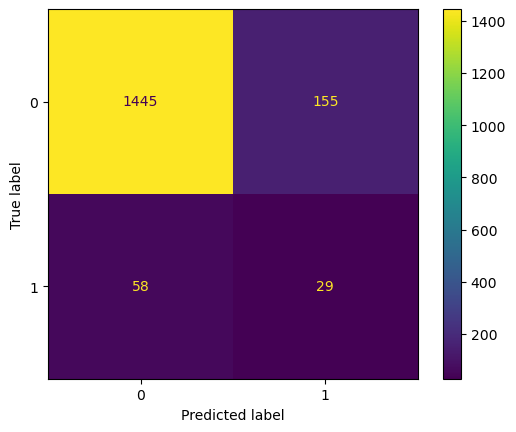

In [28]:
#Printing the confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

By analyzing the confusion matrix that the model has correctly predicted 1445(TP) +  29(TN) = 1474 cases but gave 
Type 1 error of  FP for 155 cases and Type 2 error FN for 58 cases.

# Multinomial Naïve Bayes
The Naive Bayes classifier is a supervised machine learning algorithm, which is commonly applied in use cases involving recommendation systems, text classification, and sentiment analysis. Since it performs well with data sets with high dimensionality, it is a favored classifier for text classification in particular. The steps involved are-

1. Feature Encoding:

First, we need to represent the categorical features numerically. This can be done through techniques like one-hot encoding, where each category is converted into a binary feature vector (e.g., "female" becomes [1, 0] and "male" becomes [0, 1]). 

2. Feature Representation:
   
Convert the encoded features and numerical features (age, avg_glucose, bmi) into a single feature vector representing the data point.

4. Class Priors:
   
Estimate the prior probabilities of both classes (stroke and not stroke) based on the overall prevalence of each class in the training data.

6. Conditional Probabilities:
   
For each feature (including the encoded ones), calculate the conditional probability of that feature value occurring in a document given each class: P(female | stroke), P(female | not stroke), P(age = 71 | stroke), and so on. These probabilities are estimated based on the frequency of each feature value within each class in the training data.

8. Bayes' Theorem:

For the data point's feature vector, apply Bayes' theorem to calculate the posterior probability of each class conditioned on the observed features: P(stroke | data point) and P(not stroke | data point).

6. Prediction:
   
The class with the higher posterior probability is predicted as the class for the data point

In [29]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier (Multinomial)
model = MultinomialNB()
model.fit(X_train, y_train)

# Making prediction on a single point from training set
predicted = model.predict([X_test.iloc[21]])

print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[0])


Actual Value: 1
Predicted Value: 1


C:\Users\mahik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [30]:
# Evaluating model predictions
y_pred = model.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8209839952578541
F1 Score: 0.778174794465097


With an accuracy of 0.8209, this model correctly predicts nearly 82% of the cases and The F1 score of 0.7782 indicates a good balance between precision and recall.

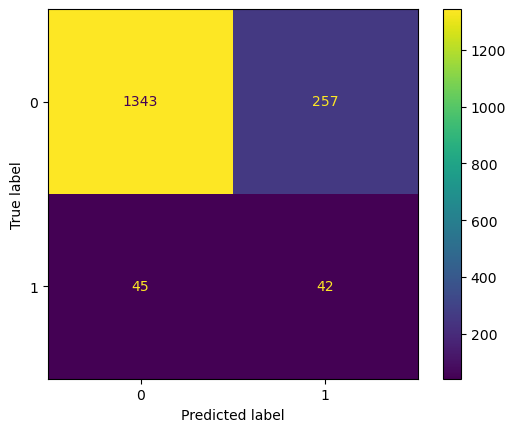

In [31]:
#Printing the confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

By analyzing the confusion matrix the model has correctly predicted 1343(TP) +  42(TN) = 1385 cases which is significantly less than previous model. It gave 
Type 1 error of  FP for 257 cases and Type 2 error FN for 45 cases.

# Bernoulli Naïve Bayes
Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. 
If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used. 

1. Adapt features and class:

Ensure all features are binary in this scenario.

2. Estimate class probabilities:

Calculate P(Stroke) and P(Not Stroke) based on the prevalence of each class.

3. Estimate individual feature probabilities:

For each feature (e.g., age), calculate P(feature value | Stroke) and P(feature value | Not Stroke) based on the frequency of that value within each class.

4. Calculate conditional probabilities:

For a new data point (patient) with specific feature values, calculate P(patient data | Stroke) and P(patient data | Not Stroke) using the individual feature probabilities obtained in step 3.

5. Apply Bayes' theorem:

Calculate P(Stroke | patient data) and P(Not Stroke | patient data) using Bayes' theorem:

P(Stroke | patient data) = (P(patient data | Stroke) * P(Stroke)) / P(patient data)

P(Not Stroke | patient data) = (P(patient data | Not Stroke) * P(Not Stroke)) / P(patient data)

6. Prediction:

The class with the higher posterior probability (P(Stroke | patient data) or P(Not Stroke | patient data)) is predicted as the likely outcome for the new data point.

In [32]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.feature_extraction.text import CountVectorizer

# Create a Naive Bayes classifier (Bernoulli)
model = BernoulliNB()
model.fit(X_train, y_train)

predicted = model.predict([X_test.iloc[21]])

print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[21])

Actual Value: 1
Predicted Value: 0


C:\Users\mahik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [33]:
# Evaluating model predictions
y_pred = model.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.94665085951393
F1 Score: 0.9667184369530037


With an accuracy of 0.9466, this model correctly predicts nearly 94% of the cases and The F1 score of 0.9667 indicates a very impressive balance between precision and recall.

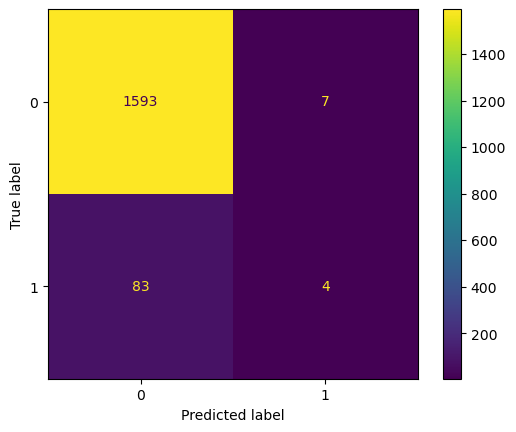

In [34]:
#Printing the confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

By analyzing the confusion matrix the model has correctly predicted 1593(TP) + 4(TN) = 1597 cases which is much higher than previous models. It gave Type 1 error of FP for 7 cases and Type 2 error FN for 83 cases.

# Multi-class Classifier
# Dataset Description


This dataset is used to predict the survival state of patients with liver cirrhosis based on 17 clinical features. Liver cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.

The dataset was created as part of a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984, and was funded by the Mayo Clinic.

Each row in the dataset provides relevant information about a patient. During 1974 to 1984, 424 PBC patients referred to the Mayo Clinic qualified for the randomised placebo-controlled trial testing the drug D-penicillamine. Of these, the initial 312 patients took part in the trial and have mostly comprehensive data. The remaining 112 patients didn't join the clinical trial but agreed to record basic metrics and undergo survival tracking. Six of these patients were soon untraceable after their diagnosis, leaving data for 106 of these individuals in addition to the 312 who were part of the randomized trial.

Here are the variables in the dataset:

- `ID`: unique identifier
- `N_Days`: number of days
- `Status`: survival state (2 = D (death), 0 = C (censored), 1 = CL (censored due to liver transplantation))
- `Drug`: drug used
- `Age`: age of the patient
- `Sex`: sex of the patient
- `Ascites`: presence of ascites
- `Hepatomegaly`: presence of hepatomegaly
- `Spiders`: presence of spiders
- `Edema`: presence of edema
- `Bilirubin`: bilirubin level
- `Cholesterol`: cholesterol level
- `Albumin`: albumin level
- `Copper`: copper level
- `Alk_Phos`: alkaline phosphatase level
- `SGOT`: SGOT level
- `Tryglicerides`: triglycerides level
- `Platelets`: platelet count
- `Prothrombin`: prothrombin level
- `Stage`: stage of the disease

# Exploratory Analysis

In [35]:
import pandas as pd

df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [36]:
df.shape #get the shape of dataframe created

(312, 20)

In [37]:
df.isna().sum() #check the number of missing values in each column

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [38]:
df.dtypes #check the data types of each column in dataframe

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [39]:
for col in df.columns: #Checking the unique values in each column
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())

Status
['D' 'C' 'CL']
Drug
['D-penicillamine' 'Placebo']
Sex
['F' 'M']
Ascites
['Y' 'N']
Hepatomegaly
['Y' 'N']
Spiders
['Y' 'N']
Edema
['Y' 'N' 'S']


In [40]:
df = df.drop(columns = ['ID']) #dropping the column id as it is irrelevant for our purpose
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [41]:
df.shape # shape will be one less than before since we dropped the ID column

(312, 19)

In [42]:
df.describe().T #getting the summary statistics of the dataframe

,count,mean,std,min,25%,50%,75%,max
N_Days,312.0,2006.362179,1123.280843,41.00,1191.00,1839.50,2697.250,4556.00
Age,312.0,18269.442308,3864.805407,9598.00,15427.75,18187.50,20715.000,28650.00
Bilirubin,312.0,3.256090,4.530315,0.30,0.80,1.35,3.425,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.50,309.50,400.000,1775.00
Albumin,312.0,3.520000,0.419892,1.96,3.31,3.55,3.800,4.64
Copper,310.0,97.648387,85.613920,4.00,41.25,73.00,123.000,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.50,1259.00,1980.000,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.60,114.70,151.900,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.25,108.00,151.000,598.00
Platelets,308.0,261.935065,95.608742,62.00,199.75,257.00,322.500,563.00


In [43]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
df[categorical].head()

There are 7 categorical variables

The categorical variables are :

 ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N


In [44]:
df = df.dropna(subset=['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets'])
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [45]:
df[categorical].isnull().sum() #no null values left

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
df.head() # now converted to numberical

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

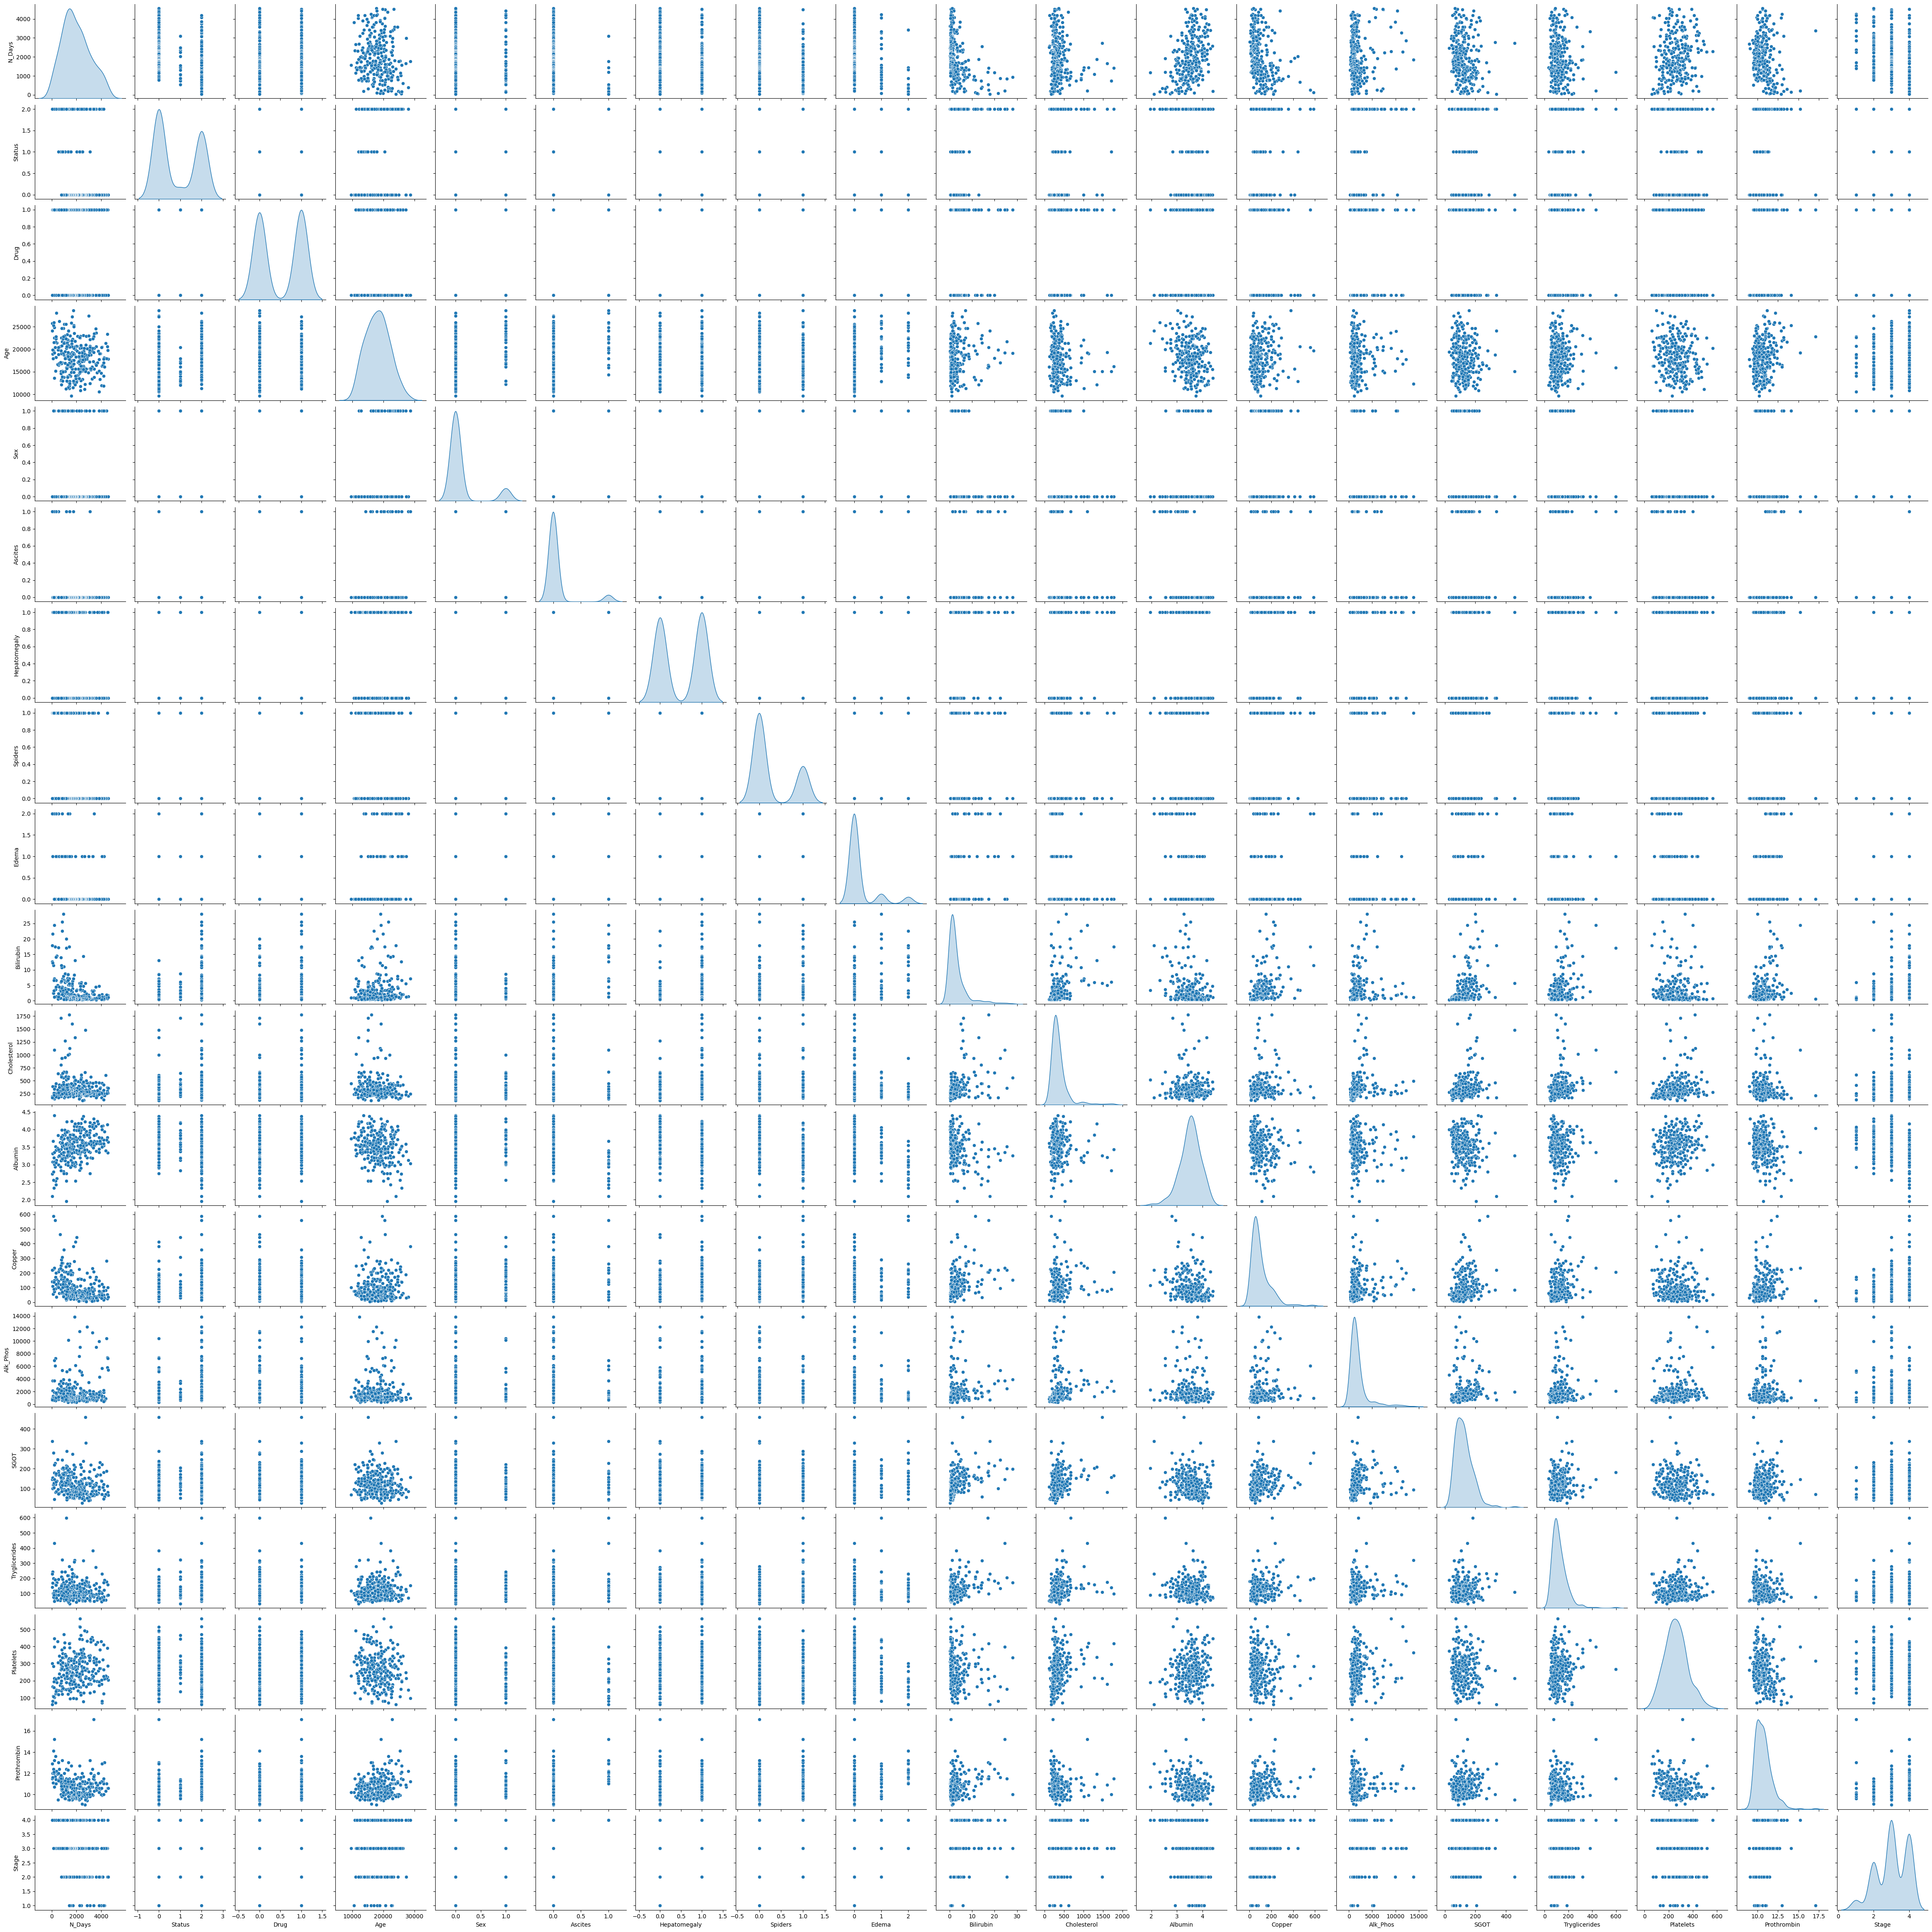

In [47]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [48]:
#getting the correlation matrix of dataframe
df.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.384526,0.019330,-0.143223,-0.029385,-0.329450,-0.261022,-0.260605,-0.347114,-0.430252,-0.136734,0.401878,-0.361386,0.104443,-0.191062,-0.163853,0.159121,-0.128406,-0.363880
Status,-0.384526,1.000000,-0.035851,0.225625,0.177618,0.290965,0.291503,0.228698,0.327235,0.427397,0.190461,-0.270554,0.394547,0.276631,0.265366,0.226601,-0.086545,0.373804,0.321367
Drug,0.019330,-0.035851,1.000000,-0.128076,-0.071586,-0.046877,0.086582,-0.009260,-0.052741,0.080922,0.021723,0.053743,-0.028832,-0.009397,0.040706,0.017799,0.039366,0.070773,0.080087
Age,-0.143223,0.225625,-0.128076,1.000000,0.240648,0.250940,0.080850,-0.004182,0.254105,0.078177,-0.156638,-0.239676,0.082631,-0.019798,-0.120868,0.024710,-0.149650,0.244774,0.178980
Sex,-0.029385,0.177618,-0.071586,0.240648,1.000000,-0.014830,0.055305,-0.142273,0.014950,-0.027474,-0.008414,0.079899,0.251731,0.019439,0.008538,0.051218,-0.095021,0.103977,0.034206
Ascites,-0.329450,0.290965,-0.046877,0.250940,-0.014830,1.000000,0.149598,0.173254,0.634763,0.414603,-0.057578,-0.403384,0.247268,0.042037,0.080520,0.225414,-0.211158,0.361506,0.306251
Hepatomegaly,-0.261022,0.291503,0.086582,0.080850,0.055305,0.149598,1.000000,0.285068,0.169855,0.288092,0.140896,-0.271408,0.224367,0.132990,0.136204,0.162103,-0.179722,0.153115,0.479132
Spiders,-0.260605,0.228698,-0.009260,-0.004182,-0.142273,0.173254,0.285068,1.000000,0.279650,0.261701,0.061817,-0.225611,0.267521,0.035218,0.091350,0.102546,-0.157704,0.228985,0.316755
Edema,-0.347114,0.327235,-0.052741,0.254105,0.014950,0.634763,0.169855,0.279650,1.000000,0.414284,-0.109524,-0.391656,0.282815,0.060116,0.140642,0.087190,-0.241685,0.396914,0.272877
Bilirubin,-0.430252,0.427397,0.080922,0.078177,-0.027474,0.414603,0.288092,0.261701,0.414284,1.000000,0.394966,-0.312043,0.460527,0.138787,0.424987,0.439691,-0.074395,0.331176,0.247861


<Axes: >

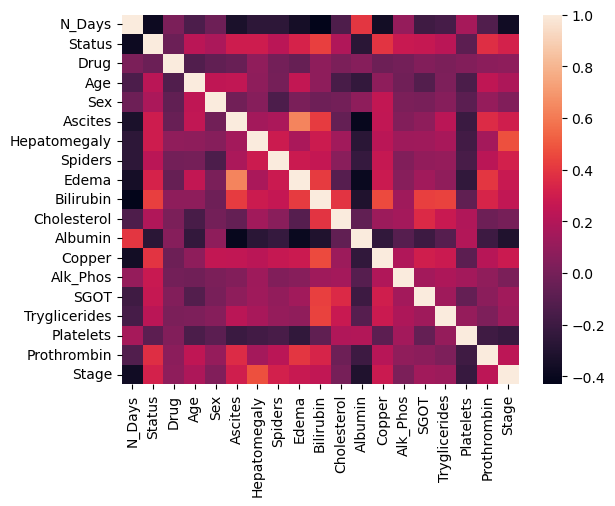

In [49]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

#### Independent Variables: 
N_Days, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage
#### Dependent Variable: 
Status

# Methodology

In the context of multi-class classification, the dependent variable (in this case, the stage of patients) has more than two possible outcomes. While binary classification deals with two distinct classes, multi-class classification deals with three or more (in this case, it is represented by either 0,1,2 and stands for C, CL, D ) 

Gaussian, Multinomial, and Bernoulli can all be extended to handle multi-class problems.

When classifying a new instance, these algorithms calculate the posterior probability for each class. The class with the highest posterior probability is the predicted class.

One common approach to extend binary classification algorithms to multi-class problems is the one-vs-all (or one-vs-rest) strategy. In this approach, a binary classifier is trained for each class, where the positive instances are the ones of that class, and the negative instances are all the others. When classifying a new instance, all classifiers predict the class, and the one that predicts "positive" with the highest confidence is the predicted class.

Another approach is the all-vs-all (or one-vs-one) strategy. In this approach, a binary classifier is trained for each pair of classes. When classifying a new instance, all classifiers predict the class, and the class that gets the most votes is the predicted class.

## Gaussian Naive Bayes

The process for a multi-class Gaussian Naive Bayes classifier is similar to the binary case, with a few key differences.

- Class Priors:
For each class in the data (here, status 0/C,1/CL,2/D), the model estimates the overall probability of cases in the training data. For example, P(status 0/C), P(status 1/CL) and P(status 2/D).


- Feature Probabilities:
For each feature in the data point, we need to estimate the conditional probability of that value given each class based on the distribution of corresponding feature values in the training data. This involves calculating the mean and standard deviation for each feature within each class.


- Bayes' Theorem Multiplication:
For each class in the data (let’s say ‘D’, ‘C’, and ‘CL’), we multiply the conditional probability of each feature in the data point by the prior probability of that class. This involves iterating through each feature in the dataset (N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin) and using its corresponding conditional probability (e.g., P(N_Days = value | class ‘d’)) multiplied by the respective class prior (P(‘D’)). We repeat this for each class (‘D’, ‘C’, and ‘CL’).


- Posterior Probability:
After multiplying all features in all classes, we divide the product for each class by the sum of products for all classes. This gives us the final posterior probability for each class, representing the likelihood of the data point belonging to that class.


- Most Likely Class:
The class with the highest posterior probability would be the predicted class for the data point. In this case, the model would compare the probabilities of the data point being in each class (‘D’, ‘C’, or ‘CL’) and choose the most likely one. This means that for each patient data point, the model calculates the probability of the patient’s status being ‘D’, ‘C’, or ‘CL’ given their feature values. The status with the highest probability is then predicted as the most likely status for that patient. 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Independent Variables
X = df[['N_Days', 'Stage', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']]
y = df['Status'] # Dependent Variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=125)
model = GaussianNB()
model.fit(X_train, y_train)

# Making prediction on a single point from test set
predicted = model.predict([X_test.iloc[21]])
print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


C:\Users\mahik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Evaluating model prediction

The evaluation metrics for a multi-class classifier are similar to those for a binary classifier, but with some differences:

- Confusion Matrix: In a multi-class scenario, the confusion matrix is no longer a 2x2 matrix. Instead, it's an nxn matrix, where n is the number of classes. Each row represents the instances of an actual class and each column represents the instances of a predicted class.

- Accuracy: The formula for accuracy remains the same. It's the sum of the diagonal elements (correct predictions) divided by the total number of predictions.

- Precision, Recall, and F1-Score: These are calculated for each class, and then averaged to get a single score. 

There are different ways to average them:

Macro-average: Calculate metrics for each class individually and then take the average. This treats all classes equally, no matter what their size is.

Micro-average: Aggregate the contributions of all classes to compute the average metric. This treats all instances equally.

Weighted-average: This is the same as macro-average, but here it also takes the class imbalance into account. Classes with more instances have a larger impact on the score.

In [57]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
y_pred = model.predict(X_test) # Predict target values for the testing set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6630434782608695
F1 Score: 0.6437976437976437


Accuracy is 0.6630 which means that the model correctly predicted the class for about 66.30% of the cases in the test set.

The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. In this case, an F1 score of 0.6438 suggests that the model is performing reasonably well, as it’s closer to 1 than to 0.

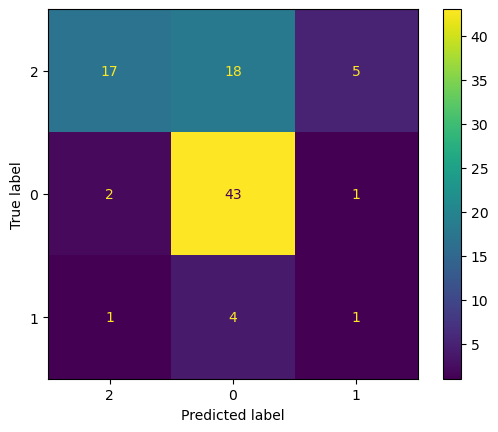

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the unique classes in the target variable
labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

Each row of the matrix represents the instances of an actual class and each column represents the instances of a predicted class.

The diagonal cells represent the instances where the predicted label is equal to the actual label, while off-diagonal cells are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions.

- Status 2: The model accurately predicted status 2 for 17 instances (top left diagonal cell). 
- Status 1: The model accurately predicted status 0 for 43 instances (the center cell). 
- Status 0: The model accurately predicted status 1 for 1 instance (bottom right cell).

The other cells represent instances where the model made incorrect predictions. For example, the model predicted status 2 for two instances that were actually of status 0 (the first cell in the second row from the left).

This matrix is used to measure the quality of the output of a classifier on the  data set. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions. The sum of each row in the confusion matrix gives the total number of instances of each class. 

# Multinomial Naïve Bayes

The process for a multi-class Naive Bayes classifier is quite similar to the binary case, with a few key differences:

- Class Priors: The model estimates the overall probability of each status in the data (let’s say statuses -1, 0, 1, and 2). For example, it calculates P(Status -1), P(Status 0), P(Status 1), and P(Status 2) based on the overall prevalence of each status in the training data.

- Conditional Probabilities: For each feature in the dataset (N_Days, Stage, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin), the model calculates the conditional probability of that feature value given each status. These probabilities are estimated based on the frequency of each feature value within each status in the training data.

- Bayes’ Theorem: For each status, the model applies Bayes’ theorem to calculate the posterior probability of that status conditioned on the observed features. This involves calculating probabilities such as P(Status -1 | data point), P(Status 0 | data point), and so on.

- Prediction: The status with the highest posterior probability is predicted as the status for the data point. In this case, the model would compare the probabilities of the data point being in each status (-1, 0, 1, or 2) and choose the most likely one.

The key difference in the multi-class case is that we’re estimating probabilities for more than two statuses, and the predicted status is the one with the highest estimated probability.

In [59]:
from sklearn.naive_bayes import MultinomialNB

# Create a Naive Bayes classifier (Multinomial)
model = MultinomialNB()
model.fit(X_train, y_train)

# Making prediction on a single point from training set
predicted = model.predict([X_test.iloc[21]])

print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 1


C:\Users\mahik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [60]:
from sklearn.metrics import accuracy_score, f1_score

# Predict the target values for the entire test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score, taking the weighted average across classes
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6304347826086957
F1 Score: 0.6388949806621615


The model correctly predicted the status of approximately 63.04% of the instances in the dataset.

The F1 score of approximately 0.639 indicates a balanced performance of the model in terms of precision and recall. This means that the model is fairly good at predicting positive instances as positive and negative instances as negative. However, there is still room for improvement.

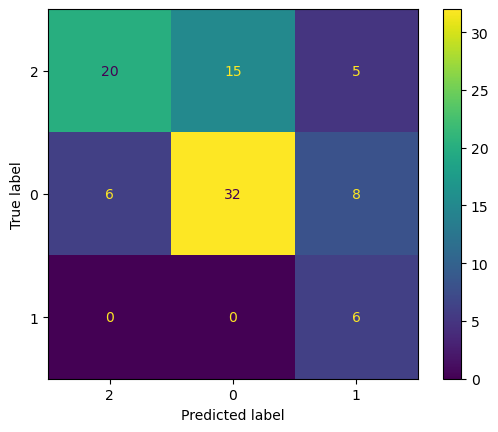

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

- The model correctly predicted status 2 for 20 instances (top left cell).
- The model correctly predicted status 0 for 32 instances (center cell).
- The model correctly predicted status 1 for 6 instances (bottom right cell).

The cells not on the diagonal represent instances where the model made incorrect predictions. For example, there were six instances where the model predicted status 2 for instances that were actually of status 0 (top center cell). Similarly, there were eight instances where the model predicted status 1 for instances that were actually of status 0 (center right cell).

# Bernoulli Naïve Bayes

- Adapt features and class: Ensure all features are binary in this scenario. The dependent variable ‘Status’ now has three classes: ‘d’, ‘C’, and ‘CL’.


- Estimate class probabilities: Calculate P(‘d’), P(‘C’), and P(‘CL’) based on the prevalence of each class in the training data.


- Estimate individual feature probabilities: For each feature (e.g., N_Days, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin), calculate P(feature value | ‘d’), P(feature value | ‘C’), and P(feature value | ‘CL’) based on the frequency of that value within each class.


- Calculate conditional probabilities: For a new data point (patient) with specific feature values, calculate P(patient data | ‘d’), P(patient data | ‘C’), and P(patient data | ‘CL’) using the individual feature probabilities obtained in the previous step.


- Apply Bayes’ theorem: Calculate P(‘d’ | patient data), P(‘C’ | patient data), and P(‘CL’ | patient data) using Bayes’ theorem:

-- P(‘d’ | patient data) = (P(patient data | ‘d’) * P(‘d’)) / P(patient data)

-- P(‘C’ | patient data) = (P(patient data | ‘C’) * P(‘C’)) / P(patient data)

-- P(‘CL’ | patient data) = (P(patient data | ‘CL’) * P(‘CL’)) / P(patient data)


- Prediction: The class with the highest posterior probability (P(‘d’ | patient data), P(‘C’ | patient data), or P(‘CL’ | patient data)) is predicted as the likely outcome for the new data point.

In [62]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=125)

# Creating an instance of BernoulliNB class to initialize the Naive Bayes model
model = BernoulliNB()
model.fit(X_train, y_train)

# Making prediction on a single point from test set
predicted = model.predict([X_test.iloc[21]])
print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


C:\Users\mahik\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


In [63]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the F1 score, taking the weighted average across classes
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5869565217391305
F1 Score: 0.5298018986518704


The model correctly predicted the status of approximately 58.70% of the instances in the dataset. 
The F1 score of approximately 0.530 indicates a somewhat balanced performance of the model in terms of precision and recall. However, there is significant room for improvement.

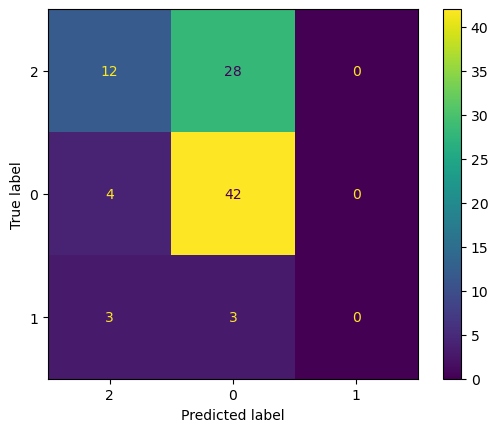

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = y.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

- The model correctly predicted status 2 for 12 instances (top left cell).
- The model correctly predicted status 0 for 42 instances (center cell).
- The model correctly predicted status 1 for 0 instances (bottom right cell).

The cells not on the diagonal represent instances where the model made incorrect predictions. For example, there were 28 instances where the model predicted status 0 for instances that were actually of status 2 (top center cell). Similarly, there were 3 instances where the model predicted status 2 for instances that were actually of status 1 (bottom left cell), and 3 instances where the model predicted status 0 for instances that were actually of status 1 (bottom center cell).

# Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X. While initially used for linear relationships, it's known for its ability to model non-linear relationships using transformations like the sigmoid function.The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0.

Linear regression gives you a continuous output, but logistic regression provides a constant output. It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Also, Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. Steps involved are:-

1. Data Preparation:

Representation of categorical features numerically.
Scaling numerical features if necessary.

2. Model Equation:

Define the logistic regression model equation:
ŷ = 1 / (1 + exp(-(b0 + b1x1 + b2x2 + ... + b10*x10)))

Where:

ŷ: predicted probability of stroke (between 0 and 1)

b0: bias term

b1, b2, ..., b10: coefficients for each feature (x1, x2, ..., x10)

3. Coefficient Estimation:

This involves an iterative optimization process based on the training data.

4. Prediction for a New Data Point:

Substitute the feature values of the new data point into the model equation.
Calculate ŷ using the estimated coefficients.

# Methodology

The steps involved in logistic regression prediction for determining if a person has a stroke or not are.All of these steps are performed by LogisticRegression class:

1) Defining Logistic Regression Function:

The core function is a linear equation transformed by the sigmoid function to output probabilities between 0 and 1.

The linear equation combines feature values (x) with their corresponding coefficients (b) and a bias term (b0):
ŷ = b0 + b1x1 + b2x2 + ... + bn*xn

The sigmoid function takes this linear equation output and applies the following formula:
ŷ = 1 / (1 + exp(-(b0 + b1x1 + b2x2 + ... + bn*xn)))

2) Model Training:

We don't directly calculate coefficients manually. Instead, we use an optimization algorithm that iteratively adjusts these coefficients to minimize the error between predicted and actual probabilities for each training instance.

3) Prediction & Interpretation:

For a new data point, substitute its feature values into the equation with trained coefficients.
The sigmoid function will convert the result to a probability (ŷ) between 0 and 1, representing the likelihood of belonging to the positive class (stroke).


# Implementation

In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

predicted = logreg.predict([X_test.iloc[21]])

print("Actual Value:", y_test.iloc[21])
print("Predicted Value:", predicted[0])

Actual Value: 1
Predicted Value: 0


C:\Users\Sireesha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sireesha\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = logreg.predict(X_test) # Uses the trained model to predict target values for the testing set and stores them in y_pred
accuracy = accuracy_score(y_pred, y_test) #Calculates the accuracy
f1 = f1_score(y_pred, y_test, average="weighted") #Calculates the F1 score, taking the weighted average across classes to account for potential class imbalances

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.949021932424422
F1 Score: 0.9721597244433986


The model correctly predicted the status of approximately 94.90% of the instances in the test set. The F1 score of approximately 0.972 indicates a very good performance of the model in terms of precision and recall. This means that the model is excellent at predicting positive instances as positive and negative instances as negative.

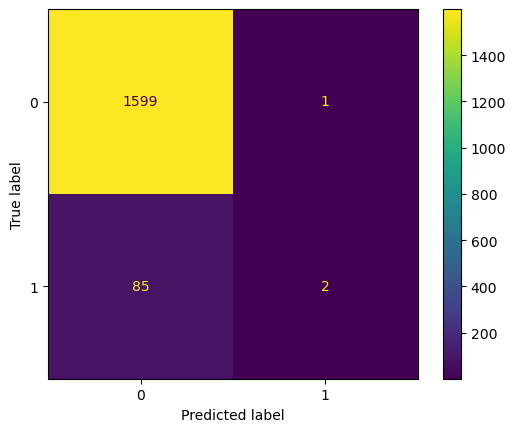

In [28]:
#Printing the confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

True Positives (TP): The model correctly predicted ‘0’. There are 1599 instances of this.

False Positives (FN): The model incorrectly predicted ‘0’ when it was actually ‘1’. There is 85 instance of this.

False Negatives (FP): The model incorrectly predicted ‘1’ when it was actually ‘0’. There is 1 instance of this.

True Negatives (TN): The model correctly predicted ‘1’. There are 2 instances of this.

AUC: 0.8353951149425288


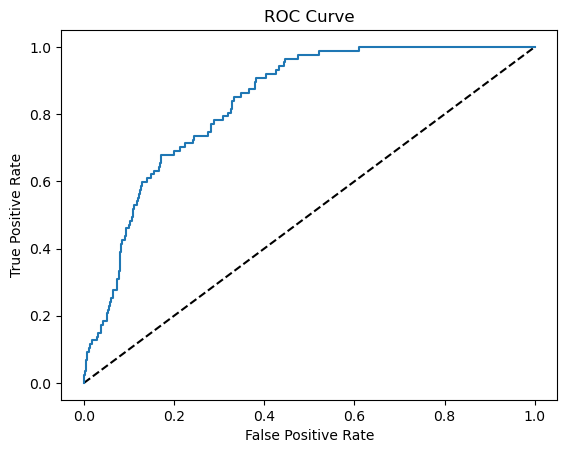

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute and print AUC score
print("AUC: {}".format(auc(fpr, tpr)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The curve is above the diagonal dashed line, indicating that the model has a good measure of separability and performs better than random guessing. The ROC curve represents the performance of a classification model at all classification thresholds. 

The X-axis represents the False Positive Rate (FPR), and the Y-axis represents the True Positive Rate (TPR). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. So, the larger the area under the curve, the better the model is at distinguishing between the classes. The diagonal line in the middle represents a random classifier, and a good classifier stays as far away from that line as possible (towards the top-left corner).

The AUC, or Area Under the Curve, is a performance measurement for classification problem at various thresholds settings. It represents the ability of the model to distinguish between positive and negative classes. The AUC score of 0.83 means that the model has about an 83.54% chance of correctly distinguishing between positive and negative instances. An AUC score of 1 represents a perfect classifier, while an AUC score of 0.5 represents a classifier that is no better than random guessing.

In [30]:
#generationg complete report of evaluation parameters

from sklearn.metrics import classification_report
target_names = ['without stroke', 'with stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

without stroke       0.95      1.00      0.97      1600
   with stroke       0.67      0.02      0.04        87

      accuracy                           0.95      1687
     macro avg       0.81      0.51      0.51      1687
  weighted avg       0.93      0.95      0.93      1687



1. Without Stroke:

- Precision: The model correctly identified 95% of the instances as ‘without stroke’ out of all instances it predicted as ‘without stroke’.
- Recall: The model correctly identified 100% of the ‘without stroke’ instances out of all actual ‘without stroke’ instances.
- F1-Score: The F1 score is the harmonic mean of precision and recall, and it’s a measure of the test’s accuracy. An F1 score of 0.97 indicates a very good model performance for ‘without stroke’ instances.

2. With Stroke:

- Precision: The model correctly identified 67% of the instances as ‘with stroke’ out of all instances it predicted as ‘with stroke’.
- Recall: The model correctly identified only 2% of the ‘with stroke’ instances out of all actual ‘with stroke’ instances.
- F1-Score: The F1 score for ‘with stroke’ instances is 0.04, which is quite low and indicates that the model’s performance for ‘with stroke’ instances is poor.
- Accuracy: The model correctly predicted the status of approximately 95% of all instances.

- Macro Avg: The macro-average (0.81 for precision, 0.51 for recall, and 0.51 for F1-score) calculates metrics for each label and finds their unweighted mean. This does not take label imbalance into account.

- Weighted Avg: The weighted-average (0.93 for precision, 0.95 for recall, and 0.93 for F1-score) calculates metrics for each label and finds their average weighted by the number of true instances for each label. This alters ‘macro’ to account for label imbalance.

# Conclusion

Thus three types of Naive Bayes algorithms have been successfully implemented for both binary class and multi class. Upon their model evaluation calculations we can come to a conclusion that: 
- Bernoulli Naïve Bayes gives the most accurate predictions upto 94% for binary class.
- Gaussian Naive Bayes gives the most accurate predictions, upto 66.3% for multi class

We also implemented Logistic Regression for the binary class problem and did similar model evaluation calculations. The accuracy was 94.9% which was higher than any of the Naive Bayes accuracy results. 
In addition, we plotted the ROC curve and computed the AUC score as well 

# References
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

https://www.codingninjas.com/studio/library/bernoulli-naive-bayes

https://medium.com/@evertongomede/understanding-multinomial-naive-bayes-classifier-fdbd41b405bf

https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

https://www.v7labs.com/blog/confusion-matrix-guide

https://www.statology.org/plot-logistic-regression-in-python/